## Final Project Submission

Please fill out:
* Student name: Calvin Omwega
* Student pace: Full time
* Scheduled project review date/time: N/A
* Instructor name: Maryann Mwikali
* Blog post URL:N/A


## 1.Introduction

# 1.1 Overview
The project's primary purpose is to generate insights that can assist Microsoft in entering and succeeding in the movie industry. We will utilize exploratory data analysis to get actionable insights to assist Microsoft determine what kind of films to develop. This project will leverage existing movie data to analyze box office trends, genre performance, and financial metrics to recommend strategic directions for Microsoft's new movie studio.

# 1.2 General Objectives
1. Identify Successful Film Genres: Determine which movie genres are performing best at the box office, both domestically and internationally.

2. Analyze Budgets versus Returns: Examine the relationship between film budgets and their financial success to identify optimal investment levels.

3. Understand Market Trends: Capture current trends in movie genres and preferences, including the most popular genre

4. Provide Strategic Recommendations: Translate findings into actionable strategies for genre selection, and budget allocation for Microsoft's studio.

# 1.3 Key Questions 
1. Which movie genres yield the highest box office earnings and ROI?
Aims to identify genres that consistently perform well, offering a safer investment for Microsoft.
2. What is the optimal budget range for producing a profitable movie?
Seeks to find a budget sweet spot that maximizes earnings without unnecessarily inflating costs.
3. How do movie budgets correlate with box office success?
Investigates whether higher budgets lead to higher gross earnings or if diminishing returns set in beyond a certain point.

# 2. Data Sets
The data sets are stored in the 'zippedData' folder which were sourced from:

- Box Office MojoLinks
    - bom.movie_gross.csv
- TheMovieDBLinks
    - tmdb.movies.csv
- The Numbers
    - tn.movie_budgets.csv


# 2.2 Iporting the libraries

In [824]:
# importing relevant libraries
import pandas as pd # Imports the pandas library, used for data manipulation and analysis, and aliases it as `pd`.
import matplotlib.pyplot as plt # Imports the pyplot module from matplotlib, a plotting library, and aliases it as `plt`.
import seaborn as sns # Imports seaborn, a statistical data visualization library based on matplotlib, and aliases it as `sns`.
import ast # For converting string representations of lists into actual lists in the 'tmdb.movies.csv'

%matplotlib inline

# 2.3 Loading and exploring the data sets
This will be done by displaying the first few collumns of the data sets

In [825]:
# Loading the relevant datasets
df_gross = pd.read_csv('bom.movie_gross.csv')
df_tmdb = pd.read_csv('tmdb.movies.csv')
df_budgets = pd.read_csv('tn.movie_budgets.csv')
df_rt = pd.read_csv('rt.movie_info.tsv', delimiter='\t')

In [826]:
df_rt.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [827]:
# Displaying the first few rows of the dataset to understand its structure and its data types.
df_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [828]:
# This is still displaying the data sets and the first few rows of the datasets to understand its structure
df_tmdb.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,19/11/2010,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,26/03/2010,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,07/05/2010,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,22/11/1995,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,16/07/2010,Inception,8.3,22186


In [829]:
# This is the last display of the last data set being used
df_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


# 3.0 Data Cleaning
Given our objective, we focus on relevant fields like genres, budgets, and box office earnings. Cleaning involves:

Converting data types: Ensuring numerical fields are correctly formatted for calculations.
Handling missing values: Deciding whether to fill in missing data or drop rows based on our analysis needs.
Extracting and standardizing genres: Particularly from tmdb.movies.csv, as genres are critical for our analysis.

In [830]:
# Cleaning the data set 'df_gross'
# first we will start with converting 'foreign_gross' to numeric, errors='coerce' turns non-numeric values into NaN
df_gross['foreign_gross'] = pd.to_numeric(df_gross['foreign_gross'], errors='coerce')

# Then create a new DataFrame, df_gross_clean, by removing all rows from df_gross that contain NaN values in any column.
df_gross_clean = df_gross.dropna()
# Converts the 'domestic_gross' column in the df_gross_clean DataFrame to float type, ensuring numeric operations can be performed.
df_gross_clean['domestic_gross'] = df_gross_clean['domestic_gross'].astype(float)

# This then Displays information about df_gross_clean DataFrame, such as the number of entries, the total number of columns, 
# the data types of each column, and the amount of memory usage.
df_gross_clean.info()
# Outputs the df_gross_clean DataFrame, showing its contents. This is useful for verifying the results of the data cleaning process.
df_gross_clean

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2002 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2002 non-null   object 
 1   studio          2002 non-null   object 
 2   domestic_gross  2002 non-null   float64
 3   foreign_gross   2002 non-null   float64
 4   year            2002 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 93.8+ KB


<ipython-input-830-e253b5b12437>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gross_clean['domestic_gross'] = df_gross_clean['domestic_gross'].astype(float)


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000.0,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000.0,2018
3309,Time Freak,Grindstone,10000.0,256000.0,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200.0,2018


In [831]:
# This code converts the 'title' column in the df_gross DataFrame to string type, then applies two string methods:
# .str.lower() converts all text to lowercase, ensuring consistency in case.
# .str.strip() removes leading and trailing whitespace from the text, cleaning up the data.
df_gross['title'] = df_gross['title'].astype(str).str.lower().str.strip()
df_budgets['movie'] = df_budgets['movie'].astype(str).str.lower().str.strip()
df_gross

,title,studio,domestic_gross,foreign_gross,year
0,toy story 3,BV,415000000.0,652000000.0,2010
1,alice in wonderland (2010),BV,334200000.0,691300000.0,2010
2,harry potter and the deathly hallows part 1,WB,296000000.0,664300000.0,2010
3,inception,WB,292600000.0,535700000.0,2010
4,shrek forever after,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3382,the quake,Magn.,6200.0,NaN,2018
3383,edward ii (2018 re-release),FM,4800.0,NaN,2018
3384,el pacto,Sony,2500.0,NaN,2018
3385,the swan,Synergetic,2400.0,NaN,2018


In [832]:
# Cleaning 'df_budgets': remove '$' and ',' from 'production_budget', 'domestic_gross', 'worldwide_gross', convert to int
df_budgets['production_budget'] = df_budgets['production_budget'].replace('[\$,]', '', regex=True).astype(int)
df_budgets['domestic_gross'] = df_budgets['domestic_gross'].replace('[\$,]', '', regex=True).astype(int)
df_budgets['worldwide_gross'] = df_budgets['worldwide_gross'].replace('[\$,]', '', regex=True).astype(int)

df_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",pirates of the caribbean: on stranger tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",dark phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",avengers: age of ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",star wars ep. viii: the last jedi,317000000,620181382,1316721747


# 3.1 Data cleaning continued
more conversions

In [833]:
# Ensures that all entries in the 'title' column of the df_gross DataFrame are of string type.
df_gross['title'] = df_gross['title'].astype(str)
# Ensures that all entries in the 'movie' column of the df_budgets DataFrame are of string type.
df_budgets['movie'] = df_budgets['movie'].astype(str)
# Converts all characters in the 'title' column of df_gross to lowercase and removes leading and trailing whitespace.
df_gross['title'] = df_gross['title'].str.lower().str.strip()
# Converts all characters in the 'movie' column of df_budgets to lowercase and removes leading and trailing whitespace.
df_budgets['movie'] = df_budgets['movie'].str.lower().str.strip()
# Outputs the modified 'title' column from the df_gross DataFrame, showing the cleaned titles.
df_gross['title']
df_budgets['movie'] # Outputs the modified 'movie' column from the df_budgets DataFrame, showing the cleaned movie names.


0                                            avatar
1       pirates of the caribbean: on stranger tides
2                                      dark phoenix
3                           avengers: age of ultron
4                 star wars ep. viii: the last jedi
                           ...                     
5777                                         red 11
5778                                      following
5779                  return to the land of wonders
5780                           a plague so pleasant
5781                              my date with drew
Name: movie, Length: 5782, dtype: object

In [834]:
# This standardizes the movie titles
df_tmdb['title'] = df_tmdb['title'].str.lower()
df_tmdb['title']


0        harry potter and the deathly hallows: part 1
1                            how to train your dragon
2                                          iron man 2
3                                           toy story
4                                           inception
                             ...                     
26512                           laboratory conditions
26513                                 _exhibit_84xxx_
26514                                    the last one
26515                                    trailer made
26516                                      the church
Name: title, Length: 26517, dtype: object

# 4.0 Merging Data sets
To analyze performance by genre, we need to merge the datasets. This could involve complex joins on movie titles or IDs, ensuring we align data correctly across different sources.

In [835]:
# Merging datasets on a common key, 'title' for simplicity
df_merged = pd.merge(df_gross, df_budgets, left_on='title', right_on='movie', how='inner')
df_merged.head()

,title,studio,domestic_gross_x,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
0,toy story 3,BV,415000000.0,652000000.0,2010,47,"Jun 18, 2010",toy story 3,200000000,415004880,1068879522
1,inception,WB,292600000.0,535700000.0,2010,38,"Jul 16, 2010",inception,160000000,292576195,835524642
2,shrek forever after,P/DW,238700000.0,513900000.0,2010,27,"May 21, 2010",shrek forever after,165000000,238736787,756244673
3,the twilight saga: eclipse,Sum.,300500000.0,398000000.0,2010,53,"Jun 30, 2010",the twilight saga: eclipse,68000000,300531751,706102828
4,iron man 2,Par.,312400000.0,311500000.0,2010,15,"May 7, 2010",iron man 2,170000000,312433331,621156389


In [836]:
# Verifying if the merge was successful
if not df_merged.empty:
    print("Merge was successful, with {} rows.".format(len(df_merged)))
else:
    print("Merge failed, resulting in an empty DataFrame.")

Merge was successful, with 1287 rows.


In [837]:
# Further merge to include primary_genre. Ensure 'title' or another unique identifier is used for accurate merging.
if 'primary_genre' in df_tmdb.columns:
    df_final = pd.merge(df_merged, df_tmdb[['title', 'primary_genre']], on='title', how='left')
    print(df_final.head())
else:
      print("Error: 'primary_genre' column not found in df_tmdb")
# Now df_final contains financials, and primary_genre which can be used for in-depth genre performance analysis

Error: 'primary_genre' column not found in df_tmdb


# 5.0 In-depth Analysis 
With a clean, merged dataset, we delve into analysis, focusing on:

Performance by Genre: Calculating average and median box office earnings and Return on Investment (ROI) for different genres.
Budget Analysis: Examining how movie budgets correlate with box office success, potentially identifying optimal budget ranges.

In [838]:

# Calculating the ROI (Return on Investment)
df_merged['ROI'] = (df_merged['worldwide_gross'] - df_merged['production_budget']) / df_merged['production_budget']
df_merged['ROI'].head()

0    4.344398
1    4.222029
2    3.583301
3    9.383865
4    2.653861
Name: ROI, dtype: float64

In [839]:
# Group by 'primary_genre' to find average worldwide gross and ROI
avg_genre_performance = df_final.groupby('primary_genre').agg({'worldwide_gross':'mean', 'ROI':'mean'}).reset_index()
avg_genre_performance

,primary_genre,worldwide_gross,ROI
0,Action,2.963086e+08,2.276092
1,Adventure,3.239360e+08,1.872695
2,Animation,4.059225e+08,2.949700
3,Comedy,8.393497e+07,2.784083
4,Crime,8.712315e+07,1.677500
5,Documentary,8.643220e+07,2.059894
6,Drama,7.401881e+07,2.828283
7,Family,2.376324e+08,2.714474
8,Fantasy,1.989176e+08,3.625845
9,History,9.046027e+07,3.491323


In [840]:
# Finding the average ROI using base Python, showcasing iteration over rows
total_roi = 0 # Initializes a variable to store the total ROI to 0.
for index, row in df_merged.iterrows(): # Loops through each row in the df_merged DataFrame to calculate the total ROI.
    total_roi += row['ROI'] # Adds the ROI for each movie to the total ROI.
average_roi = total_roi / len(df_merged) # Calculates the average ROI by dividing the total ROI by the number of entries in df_merged.
print(f"Average ROI: {average_roi}")# Prints the calculated average ROI.

Average ROI: 3.3076326171896193


# 5.1 In-depth Analysis continued
This section takes the data sets and makes sure the merged data is used to find the movies and then later the genres with the highest ROI

In [841]:
# Finding the average ROI using base Python, showcasing iteration over rows
high_roi_movies = df_merged[df_merged['ROI'] > 2.0] # Filters movies in df_merged with an ROI greater than 2.0, indicating a high return on investment.
print(high_roi_movies[['title', 'ROI']])

                           title        ROI
0                    toy story 3   4.344398
1                      inception   4.222029
2            shrek forever after   3.583301
3     the twilight saga: eclipse   9.383865
4                     iron man 2   2.653861
...                          ...        ...
1266     paul, apostle of christ   4.105900
1270                   hell fest   2.294406
1271        unfriended: dark web  15.434588
1272                     upgrade   4.517762
1273                      unsane   8.496621

[513 rows x 2 columns]


# 5.2 In-depth Analysis based on budget
This takes the merged data and categorizes the movie tiers from lowest to highest based on their budgets. Meaning the movies with the lowest budgets are compared to the movies with the highest budget and it takes a look at their ROI.

In [842]:
# Analyzing budget ranges. We categorize movies into budget tiers before calculating average ROI for each tier.
df_final['budget_tier'] = pd.qcut(df_final['production_budget'], 4, labels=["Low", "Medium", "High", "Very High"]) # Categorizes movies in df_final into budget tiers based on their production budget. 
# It uses quartiles to create 4 budget tiers: Low, Medium, High, and Very High.
budget_tier_performance = df_final.groupby('budget_tier').agg({'ROI':'mean'}).reset_index() # Groups movies in df_final by their budget tier and calculates the average ROI for each tier.
# This helps to understand how budget size relates to return on investment.
budget_tier_performance

,budget_tier,ROI
0,Low,6.735857
1,Medium,2.356749
2,High,1.918749
3,Very High,2.181144


# 5.3 Linking genre_id to genres 
since the df_tmdb file has genre ids and the ids all link to a name of a genres we had to take and link the data from the data sets. One limitation is that since no sql was used/imported, it was done mannually. 

In [843]:
# Expandeding genre ID to name mapping
# This was done because in the df_tmdb file the generes are under genre_id and the ids match up to genres from the data base which was recovered to come up with a conclusion. 
#genre_id_to_name just converts the id to a name to make it easier to understand. 
genre_id_to_name = {
    28: "Action",
    12: "Adventure",
    16: "Animation",
    35: "Comedy",
    80: "Crime",
    99: "Documentary",
    18: "Drama",
    10751: "Family",
    14: "Fantasy",
    36: "History",
    27: "Horror",
    10402: "Music",
    9648: "Mystery",
    10749: "Romance",
    878: "Science Fiction",
    10770: "TV Movie",
    53: "Thriller",
    10752: "War",
    37: "Western"
}
# The df_tmdb['genre_ids'] might contain string representations of lists
def safely_convert_string_to_list(string):
    try:
        # We then evaluate the string as a Python literal (list)
        return ast.literal_eval(string)
    except ValueError:
        # This then returns an empty list if there's an error (e.g., if the string can't be converted to a list)
        return []

# Convert 'genre_ids' from string representations of lists to actual lists (if necessary)
df_tmdb['genre_ids'] = df_tmdb['genre_ids'].apply(lambda x: safely_convert_string_to_list(x) if isinstance(x, str) else x)

# Mapping genre IDs to names
def map_genre_ids_to_names(ids):
    return [genre_id_to_name.get(genre_id, "Unknown") for genre_id in ids]

df_tmdb['genre_names'] = df_tmdb['genre_ids'].apply(map_genre_ids_to_names)
df_tmdb['genre_names']

0                   [Adventure, Fantasy, Family]
1        [Fantasy, Adventure, Animation, Family]
2           [Adventure, Action, Science Fiction]
3                    [Animation, Comedy, Family]
4           [Action, Science Fiction, Adventure]
                          ...                   
26512                            [Horror, Drama]
26513                          [Drama, Thriller]
26514               [Fantasy, Action, Adventure]
26515                [Family, Adventure, Action]
26516                         [Thriller, Horror]
Name: genre_names, Length: 26517, dtype: object

In [844]:
# Function to extract primary genre name from genre_ids list
def extract_primary_genre(genre_ids_list, genre_mapping):
    if not genre_ids_list:  # Check if genre_ids list is empty
        return "Unknown"  # Return 'Unknown' if no genre ID is available
    primary_genre_id = genre_ids_list[0]  # Assuming the first genre is the primary
    return genre_mapping.get(primary_genre_id, "Unknown")  # Map genre ID to name, return 'Unknown' if ID not found

# This applies the function to each row in df_tmdb to create a new 'primary_genre' column
df_tmdb['primary_genre'] = df_tmdb['genre_ids'].apply(lambda x: extract_primary_genre(x, genre_id_to_name))
df_tmdb['primary_genre']

0        Adventure
1          Fantasy
2        Adventure
3        Animation
4           Action
           ...    
26512       Horror
26513        Drama
26514      Fantasy
26515       Family
26516     Thriller
Name: primary_genre, Length: 26517, dtype: object

# 6.0 Data Visualization
Visualizations help communicate our findings effectively. We might create:

Bar charts of average earnings by genre: To identify which genres perform best at the box office.

Bar charts of average ROI by budget tier: This is to identify the ROI with the tier meaning movies with budgets from low to very high budgets and how the ROI relates to the budgets.

Bar charts of Number of movies by genres in the TMDB Dataset: To identify the most popular genre that can later be used to make an informed decision. 

Scatter plots of budget vs. ROI: To explore the relationship between investment and return.

Scatter plots of production budget vs. worldwide gross: To explore the correlation between the budget and the worldwide gross.

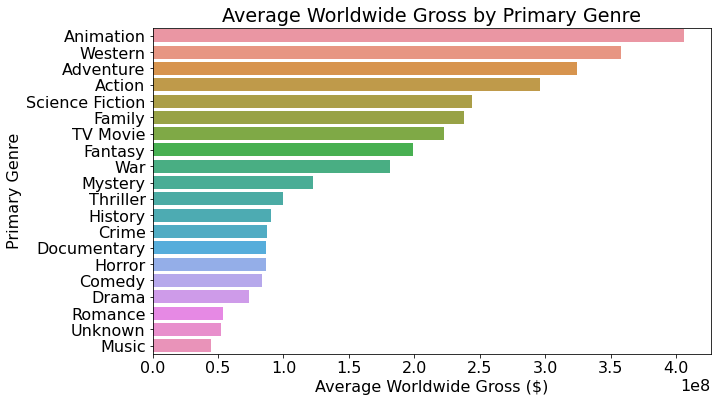

In [845]:
# Scatter plot for Average worldwide gross by primary genre
plt.rcParams.update({'font.size': 16})  # Adjusts the size of the font in the graphs
# Calculates the average worldwide gross by primary genre
avg_gross_by_genre = df_final.groupby('primary_genre')['worldwide_gross'].mean().sort_values(ascending=False)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_gross_by_genre.values, y=avg_gross_by_genre.index)
plt.title('Average Worldwide Gross by Primary Genre')
plt.xlabel('Average Worldwide Gross ($)')
plt.ylabel('Primary Genre')
plt.show()

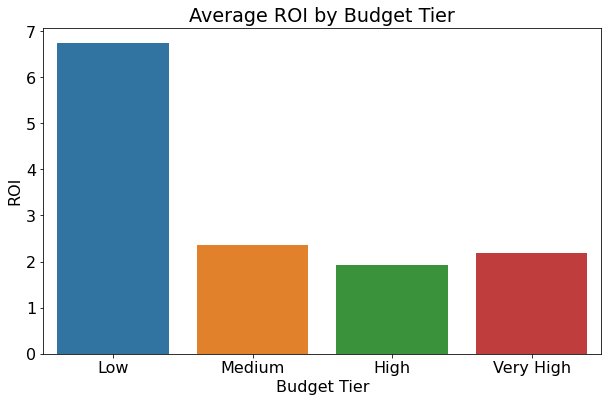

In [846]:
# Plotting average ROI by budget tier
plt.figure(figsize=(10, 6))
sns.barplot(x='budget_tier', y='ROI', data=budget_tier_performance.sort_values('ROI', ascending=False))
plt.title('Average ROI by Budget Tier')
plt.xlabel('Budget Tier')
plt.ylabel('ROI')
plt.show()

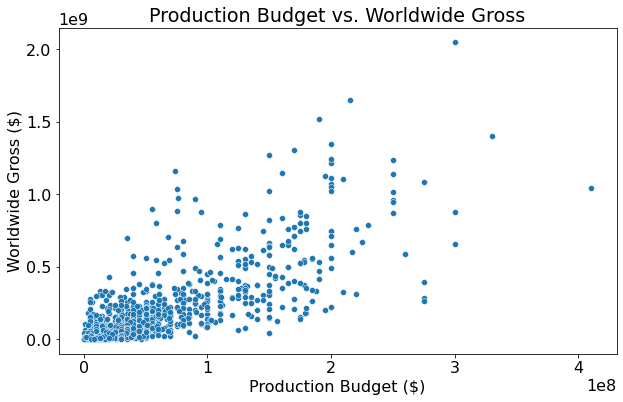

In [847]:
# Scatter plot of production budget vs. worldwide gross
plt.figure(figsize=(10, 6))
sns.scatterplot(x='production_budget', y='worldwide_gross', data=df_merged)
plt.title('Production Budget vs. Worldwide Gross')
plt.xlabel('Production Budget ($)')
plt.ylabel('Worldwide Gross ($)')
plt.show()


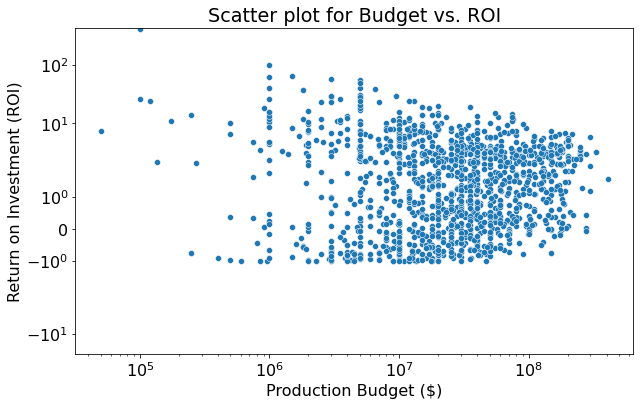

In [848]:
# Plotting budget vs. ROI
plt.figure(figsize=(10, 6))
sns.scatterplot(x='production_budget', y='ROI', data=df_merged)
plt.title('Scatter plot for Budget vs. ROI')
plt.xlabel('Production Budget ($)')
plt.ylabel('Return on Investment (ROI)')
plt.xscale('log')  # Using a logarithmic scale for better visualization
plt.yscale('symlog')  # Symmetrical log scale to handle negative ROI values
plt.show()


In [851]:
# Getting data from the DataFrame df_merged that contains 'production_budget' and 'ROI' columns
# Here's a calculation of the Pearson correlation coefficient:

correlation = df_merged['production_budget'].corr(df_merged['ROI'])
print(f"The Pearson correlation coefficient between production budget and ROI is: {correlation}")


The Pearson correlation coefficient between production budget and ROI is: -0.06959210502134314


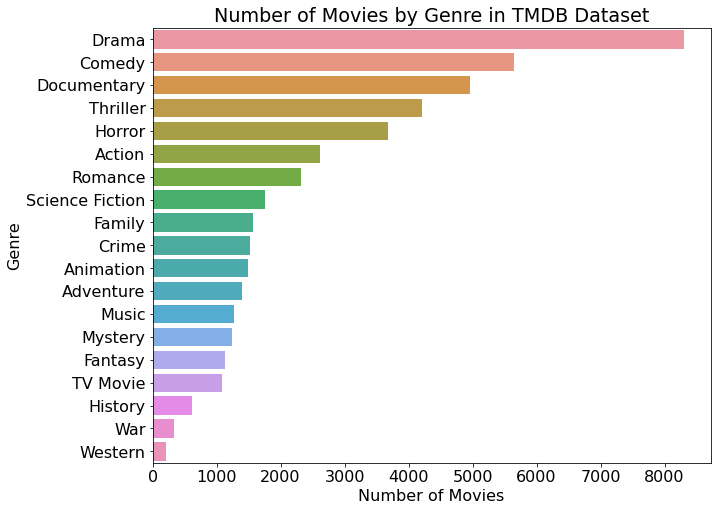

In [850]:
# Number of movies by genres in the TMDB Dataset
# Explode 'genre_names' for visualization
df_tmdb_exploded = df_tmdb.explode('genre_names')

# Count movies by genre
genre_counts = df_tmdb_exploded['genre_names'].value_counts()

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(y=genre_counts.index, x=genre_counts.values)
plt.title('Number of Movies by Genre in TMDB Dataset')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()